# k-Means Clustering

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

### Import Modules

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from IPython.core.display import HTML
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

### Generate synthetic two-dimensional data

In [2]:
X, y = make_blobs(random_state=10)

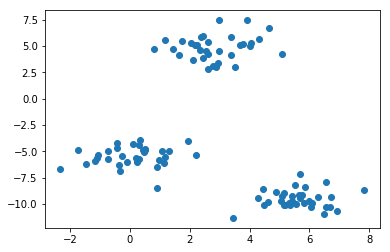

In [3]:
plt.scatter(X[:, 0], X[:, 1])

### Build the clustering model

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[2 2 0 1 0 0 1 2 0 1 1 0 0 2 2 0 1 0 1 0 1 2 0 2 1 0 0 0 0 1 2 0 0 1 2 2 2
 0 0 0 2 1 2 2 0 1 1 1 2 1 0 2 1 1 2 1 0 2 1 1 0 0 2 2 2 1 1 2 2 2 0 1 0 0
 2 0 0 2 1 1 1 0 1 0 2 0 2 1 2 2 1 1 1 2 2 2 0 1 1 1]


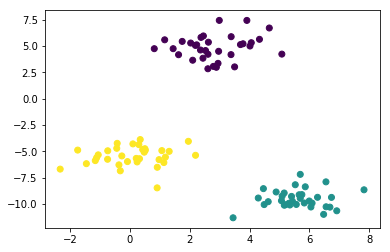

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)

In [7]:
ssd = np.array([])
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state=2018)
    kmeans.fit(X)
    ssd = np.append(ssd, kmeans.inertia_)

In [8]:
ssd = pd.DataFrame(ssd)
ssd['Clusters'] = range(1,21)
ssd.columns = ['SSD','Clusters']

Text(0,0.5,'Sum of Squared Errors')

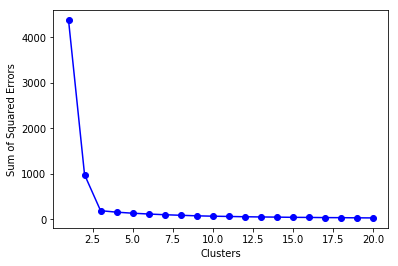

In [9]:
plt.plot(ssd.iloc[:,1], ssd.iloc[:,0], 'b-o')
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Errors')

### Load the data from CSV file

In [10]:
wine = pd.read_csv('data/winequality.csv')

In [11]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [12]:
display(HTML(wine.head().to_html()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [13]:
kmeans = KMeans(n_clusters=2, random_state=2018)
kmeans.fit(wine.drop(['color'], axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2018, tol=0.0001, verbose=0)

In [14]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [16]:
wine['color'] = np.where(wine['color']=='red','red','yellow')

### Visualize 2D Plot with 2 Variables and Color of Wine

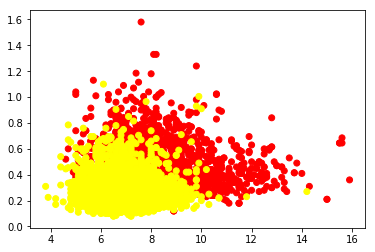

In [17]:
plt.scatter(wine.iloc[:, 0], wine.iloc[:, 1], c = wine.iloc[:,13])

### Visualize 2D Plot with 2 Variables and with k-Means Clusters

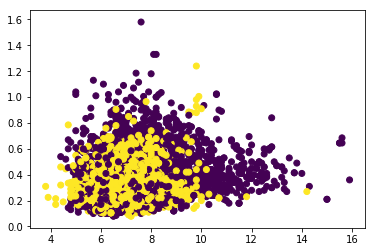

In [18]:
plt.scatter(wine.iloc[:, 0], wine.iloc[:, 1], c = kmeans.labels_)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wine.drop(['color'], axis=1))
# transform the digits data onto the first two principal components
wine_pca = pca.transform(wine.drop(['color'], axis=1))

In [20]:
wine_pca.shape

(6497, 2)

In [21]:
type(wine_pca)

numpy.ndarray

In [22]:
wine_pca = pd.DataFrame(wine_pca)
wine_pca.columns = ['PC1','PC2']
wine_pca['color'] = wine['color']

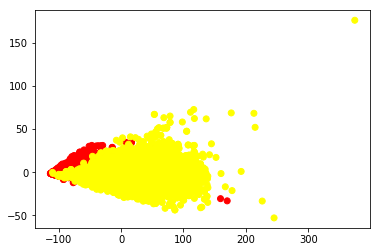

In [23]:
plt.scatter(wine_pca.iloc[:, 0], wine_pca.iloc[:, 1], c = wine_pca.iloc[:, 2])

In [24]:
kmeans.inertia_

8595901.8371305838

In [25]:
ssd = np.array([])
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state=2018)
    kmeans.fit(wine.drop(['color'], axis=1))
    ssd = np.append(ssd, kmeans.inertia_)

In [26]:
ssd = pd.DataFrame(ssd)
ssd['Clusters'] = range(1,21)
ssd.columns = ['SSD','Clusters']

Text(0,0.5,'Sum of Squared Errors')

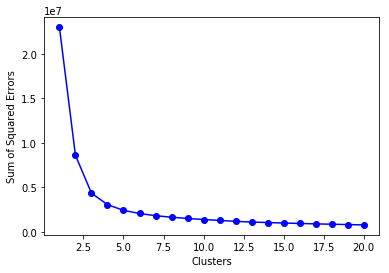

In [27]:
plt.plot(ssd.iloc[:,1], ssd.iloc[:,0], 'b-o')
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Errors')